### Molten Salt Comparison

In this tutorial we will compare two large molten salt simulation of NaCl and KCl to see how their structures and properties differ from one another.

This tutorial assumes that you are already familiar with the general MDSuite interface and have looked over the previous tutorial.

In [1]:
import mdsuite as mds
import matplotlib.pyplot as plt
from zinchub import DataHub

2022-01-31 15:08:49.649175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib:
2022-01-31 15:08:49.649199: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-31 15:08:54.364403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib:
2022-01-31 15:08:54.364683: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib:
2022-01-3

In this tutorial we are using two, 1000 atom simulations of NaCl and KCl run for 5000 time steps. Keep in mind, due to the size of these files (~140 MB each) they may take some time to download and unzip (within a minute depending on internet connection).

In [2]:
# NaCl_file = DataHub(url="https://github.com/zincware/DataHub/tree/main/NaCl_rnd_md")
# KCl_file = DataHub(url="https://github.com/zincware/DataHub/tree/main/KCl_rnd_md")

# KCl_data = KCl_file.get_file('.')[0]
# NaCl_data = NaCl_file.get_file('.')[0]

In [3]:
md_project = mds.Project(name="Molten_Salt_Comparison", storage_path='.')

2022-01-31 15:08:55,574 - INFO: Loading the class state
2022-01-31 15:08:55,614 - INFO: Available experiments are: [1: NaCl, 2: KCl]


Again, depending on your computer, adding the data may take up between 25s to 1m total.

In [4]:
NaCl_experiment = md_project.add_experiment(
    name="NaCl", timestep=0.002, units='metal', temperature=1200.0, #simulation_data=NaCl_data
)
KCl_experiment = md_project.add_experiment(
    name="KCl", timestep=0.002, units='metal', temperature=1200.0, #simulation_data=KCl_data
)

2022-01-31 15:08:55,636 - INFO: This experiment already exists
2022-01-31 15:08:55,689 - INFO: This experiment already exists


## Structural Information

The first thing we want to study is how the structure of these salts compare. Let's do so by comparing the RDFs, ADFs, coordination numbers, and potential of mean force values for the dominant interactions in each system.

For each of these computations we will directly call the project. This is simply a faster way of performing the same computation on all of the experiments at one time. What is returns is a dictionary of information for each experiment. We will demonstrate here how one can use this to extract relevant information.

In [5]:
RDF_Data = md_project.run.RadialDistributionFunction(number_of_configurations=1000, plot=False, cutoff=15.0)

In [6]:
NaCl_experiment.run.CoordinationNumbers(
    rdf_data=RDF_Data['NaCl'], savgol_window_length=101, savgol_order=7, number_of_shells=3
)

Loading BokehJS ...

Exp1_Coordination_Numbers_16

In [7]:
KCl_experiment.run.CoordinationNumbers(
    rdf_data=RDF_Data['KCl'], savgol_window_length=101, savgol_order=7, number_of_shells=2
)

Loading BokehJS ...

Exp2_Coordination_Numbers_17

In [8]:
KCl_experiment.run.PotentialOfMeanForce(
    rdf_data=RDF_Data['KCl'], savgol_window_length=101, savgol_order=7, number_of_shells=2
)

Loading BokehJS ...

Exp2_Potential_of_Mean_Force_18

In [9]:
radii = RDF_Data['NaCl']['Na_Cl']['x']
NaCl_rdf = RDF_Data['NaCl']['Na_Cl']['y']
KCl_rdf = RDF_Data['KCl']['Cl_K']['y']

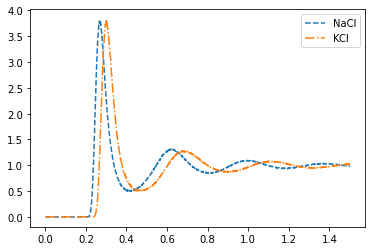

In [13]:
plt.plot(radii, NaCl_rdf, '--', label='NaCl')
plt.plot(radii, KCl_rdf, '-.', label='KCl')
plt.legend()
plt.show()

We can see that the peak heights of the two salts are very similar whilst the position of the NaCl is left-shifted with respect to the KCl. This suggests that the Na and Cl ions are closer together than the K and Cl ions in their respective systems. This is consistent with the fact that Potassium atoms are larger than Sodium atoms and therefore would equilibrate at a greater separation. Now let's further investigate the peak height by looking at coordination numbers.

In [ ]:
POMF_Data = md_project.run.PotentialOfMeanForce(
    plot=False, savgol_order=3, savgol_window_length=21
)

In [ ]:
NaCl_radii = POMF_Data['NaCl'].data_dict['Na_Cl']['r']
NaCl_POMF = POMF_Data['NaCl'].data_dict['Na_Cl']['pomf']
NaCl_val = POMF_Data['NaCl'].data_dict['Na_Cl']['min_pomf']
KCl_radii = POMF_Data['KCl'].data_dict['Cl_K']['r']
KCl_POMF = POMF_Data['KCl'].data_dict['Cl_K']['pomf']
KCl_val = POMF_Data['KCl'].data_dict['Cl_K']['min_pomf']

In [ ]:
plt.plot(NaCl_radii, NaCl_POMF, '--', label=f'NaCl: {NaCl_val: .3e} eV')
plt.plot(KCl_radii, KCl_POMF, '-.', label=f"KCl: {KCl_val: .3e} eV")
plt.legend()
plt.show()